In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienia wyświetlania
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Wczytanie danych
df_provider = pd.read_csv('Train-1542865627584.csv')
df_beneficiary = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
df_inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
df_outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')


In [6]:
# Sprawdzenie rozmiaru i typów danych
#print("Provider Data Shape:", df_provider.shape)
print("Beneficiary Data Shape:", df_beneficiary.shape)
# print("Inpatient Data Shape:", df_inpatient.shape)
# print("Outpatient Data Shape:", df_outpatient.shape)

# Podstawowe informacje o danych
# print("\nProvider Data Info:")
# print(df_provider.info())

print("\nBeneficiary Data Info:")
print(df_beneficiary.info())

# print("\nInpatient Data Info:")
# print(df_inpatient.info())

# print("\nOutpatient Data Info:")
# print(df_outpatient.info())

# Podstawowe statystyki opisowe
# print("\nProvider Data Description:")
# print(df_provider.describe(include='all'))

print("\nBeneficiary Data Description:")
print(df_beneficiary.describe(include='all'))

# print("\nInpatient Data Description:")
# print(df_inpatient.describe(include='all'))

# print("\nOutpatient Data Description:")
# print(df_outpatient.describe(include='all'))

Beneficiary Data Shape: (138556, 25)

Beneficiary Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heart

In [7]:
# Sprawdzenie brakujących danych
# print("\nMissing Values in Provider Data:")
# print(df_provider.isnull().sum())

print("\nMissing Values in Beneficiary Data:")
print(df_beneficiary.isnull().sum())

# print("\nMissing Values in Inpatient Data:")
# print(df_inpatient.isnull().sum())

# print("\nMissing Values in Outpatient Data:")
# print(df_outpatient.isnull().sum())


Missing Values in Beneficiary Data:
BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                  

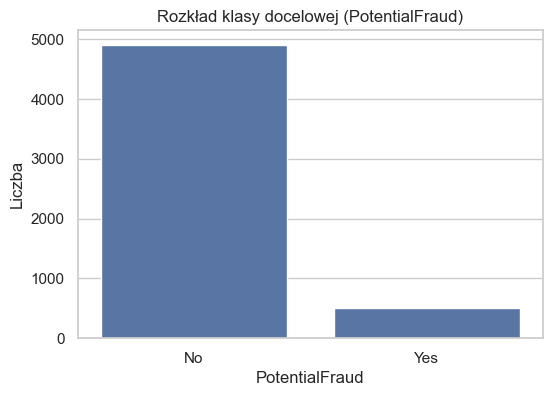


Procentowy rozkład klasy docelowej:
PotentialFraud
No     90.64695
Yes     9.35305
Name: proportion, dtype: float64


In [8]:
# Rozkład klasy docelowej
plt.figure(figsize=(6, 4))
sns.countplot(x='PotentialFraud', data=df_provider)
plt.title('Rozkład klasy docelowej (PotentialFraud)')
plt.xlabel('PotentialFraud')
plt.ylabel('Liczba')
plt.show()

# Procentowy rozkład
fraud_counts = df_provider['PotentialFraud'].value_counts(normalize=True) * 100
print("\nProcentowy rozkład klasy docelowej:")
print(fraud_counts)

In [9]:
# Łączenie danych
df_merged_inpatient = pd.merge(df_inpatient, df_beneficiary, on='BeneID', how='left')
df_merged_outpatient = pd.merge(df_outpatient, df_beneficiary, on='BeneID', how='left')
df_merged_inpatient = pd.merge(df_merged_inpatient, df_provider[['Provider', 'PotentialFraud']], on='Provider', how='left')
df_merged_outpatient = pd.merge(df_merged_outpatient, df_provider[['Provider', 'PotentialFraud']], on='Provider', how='left')

# Sprawdzenie wyników
print("\nMerged Data Shape:", df_merged_inpatient.shape)
print("\nMerged Data Info:")
print(df_merged_inpatient.info())

print("\nMerged Data Shape:", df_merged_outpatient.shape)
print("\nMerged Data Info:")
print(df_merged_outpatient.info())


Merged Data Shape: (40474, 55)

Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BeneID                           40474 non-null  object 
 1   ClaimID                          40474 non-null  object 
 2   ClaimStartDt                     40474 non-null  object 
 3   ClaimEndDt                       40474 non-null  object 
 4   Provider                         40474 non-null  object 
 5   InscClaimAmtReimbursed           40474 non-null  int64  
 6   AttendingPhysician               40362 non-null  object 
 7   OperatingPhysician               23830 non-null  object 
 8   OtherPhysician                   4690 non-null   object 
 9   AdmissionDt                      40474 non-null  object 
 10  ClmAdmitDiagnosisCode            40474 non-null  object 
 11  DeductibleAmtPaid            

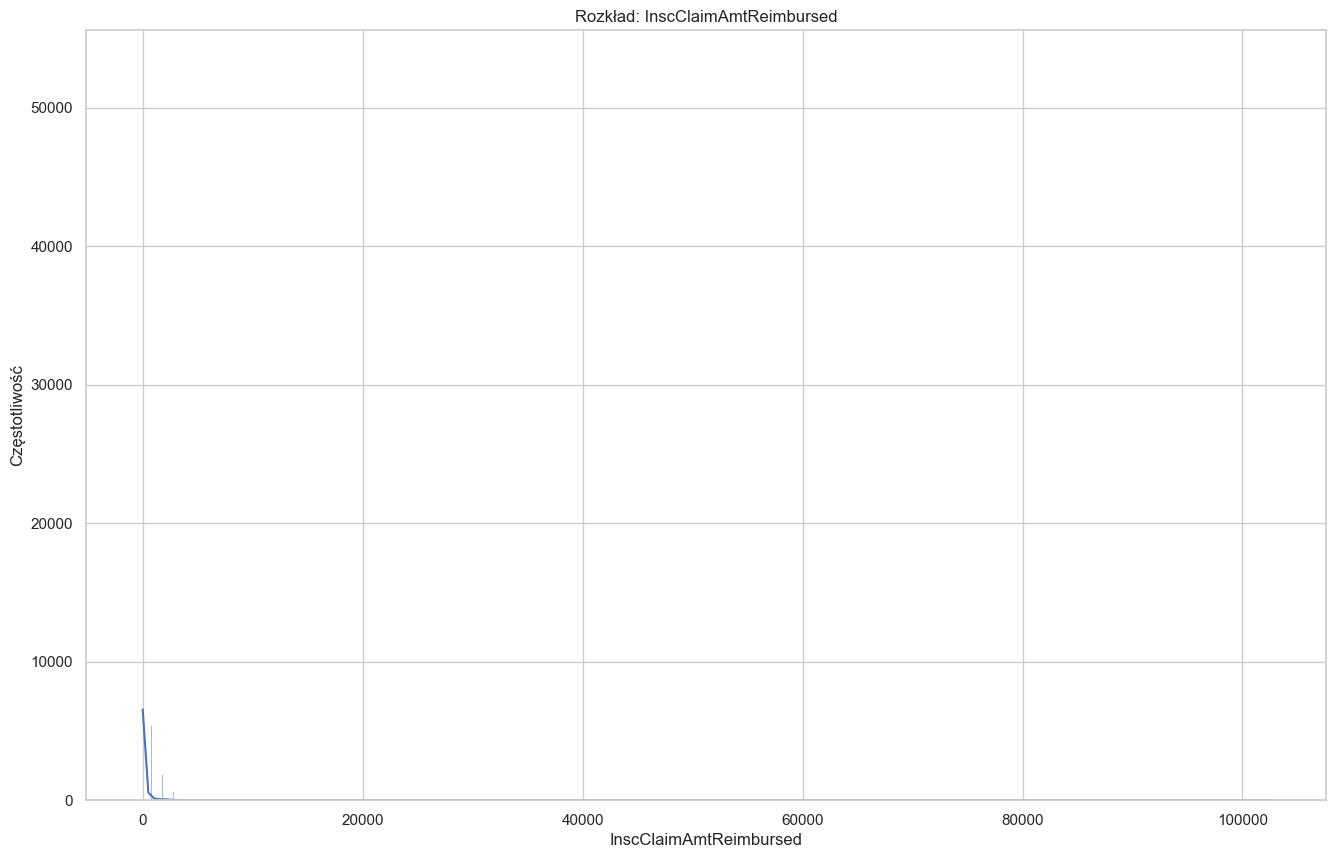

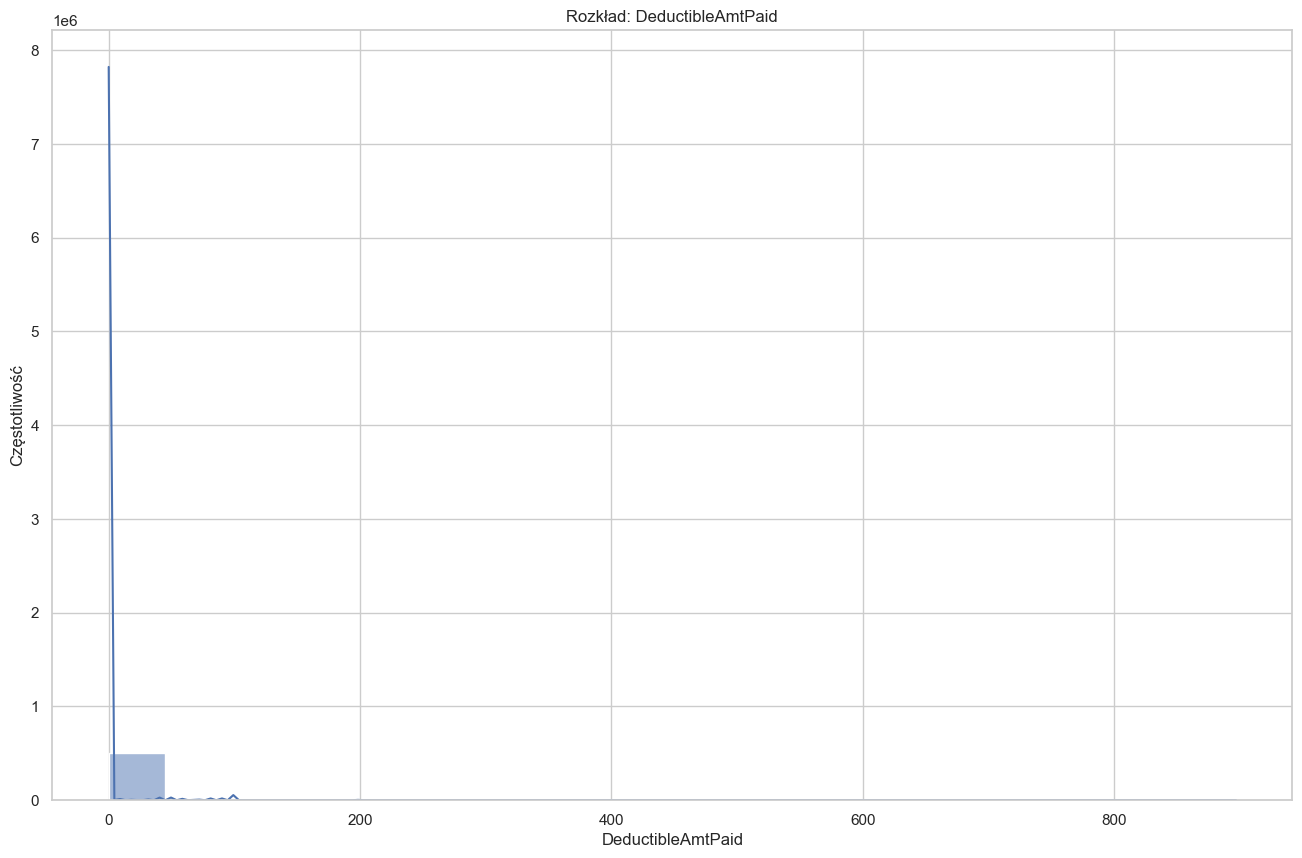

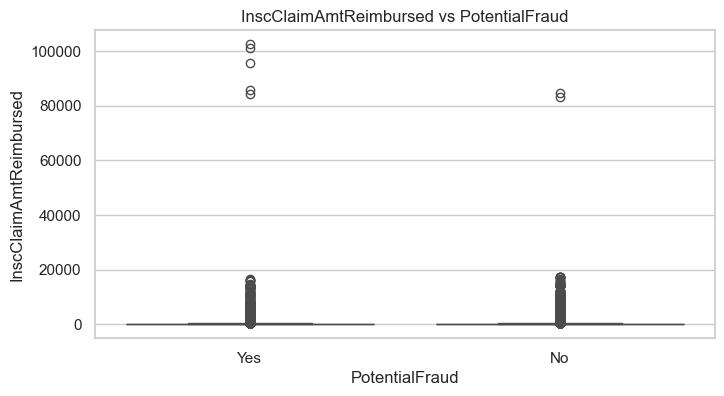

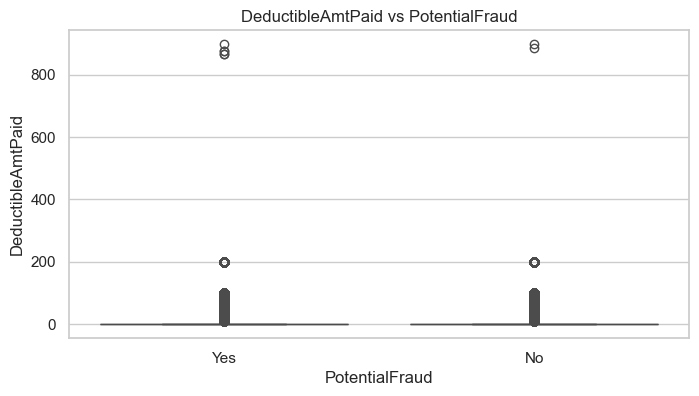

In [11]:
# Wybór zmiennych liczbowych
num_cols = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid'] #'TreatmentDays', 'Age'

# Histogramy dla zmiennych liczbowych
for col in num_cols:
    plt.figure(figsize=(16, 10))
    sns.histplot(df_merged_outpatient[col].dropna(), kde=True)
    plt.title(f'Rozkład: {col}')
    plt.xlabel(col)
    plt.ylabel('Częstotliwość')
    plt.show()

# Wykresy pudełkowe dla zmiennych liczbowych względem klasy docelowej - dobre, ale po połączeniu tabel
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='PotentialFraud', y=col, data=df_merged_outpatient)
    plt.title(f'{col} vs PotentialFraud')
    plt.xlabel('PotentialFraud')
    plt.ylabel(col)
    plt.show()

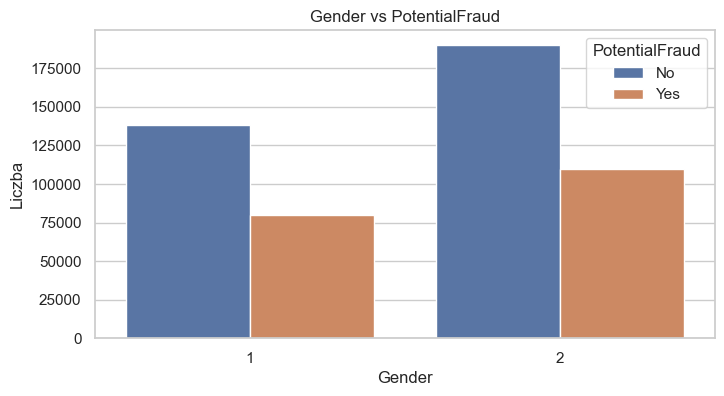

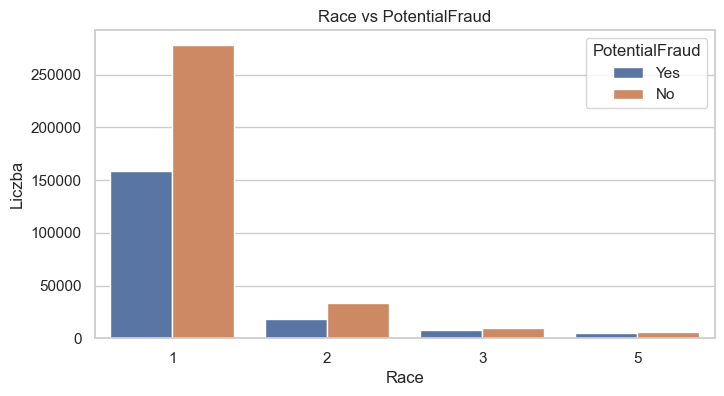

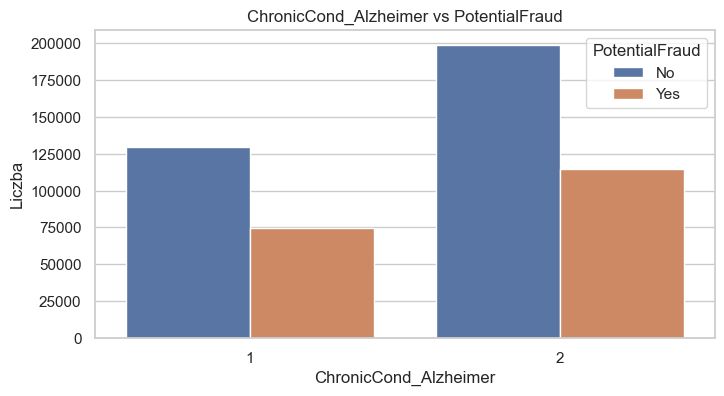

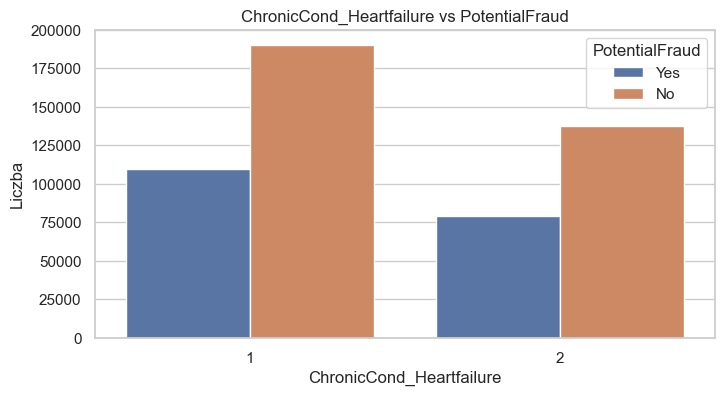

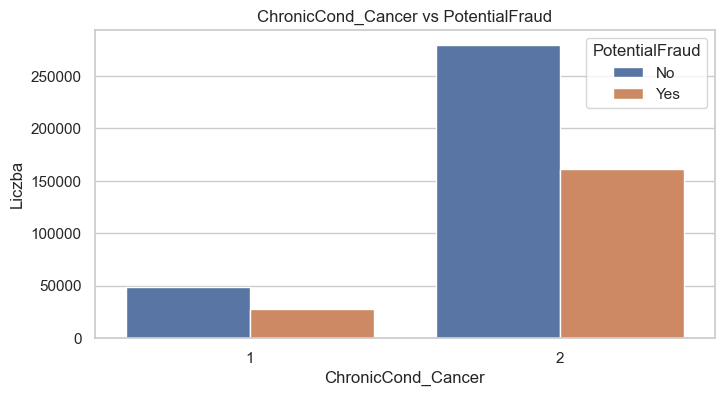

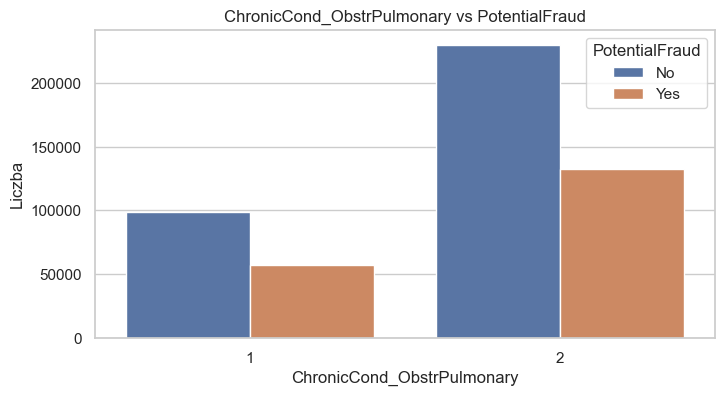

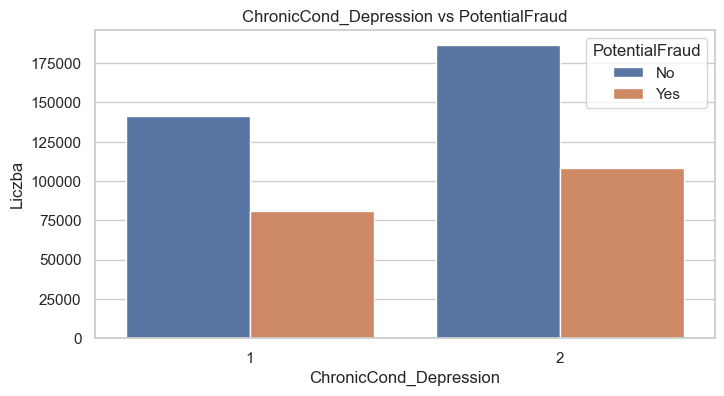

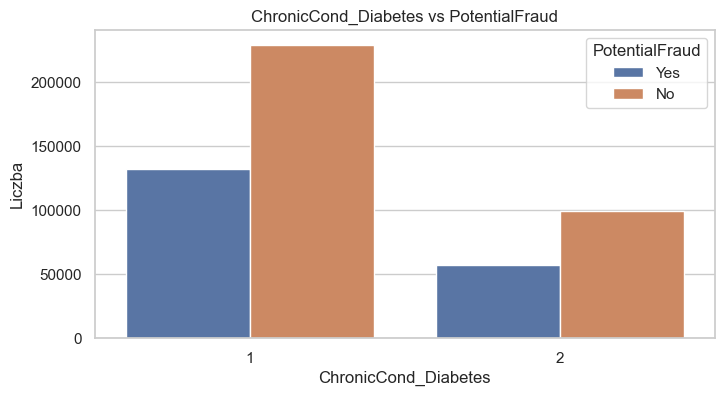

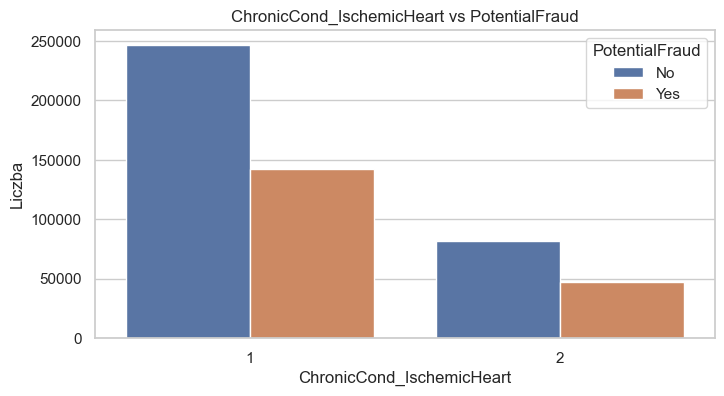

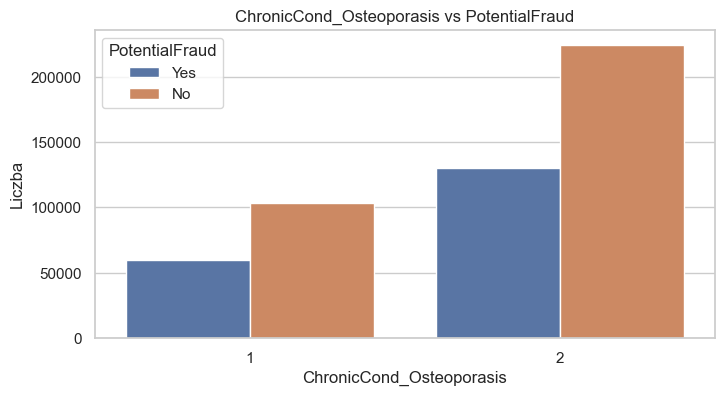

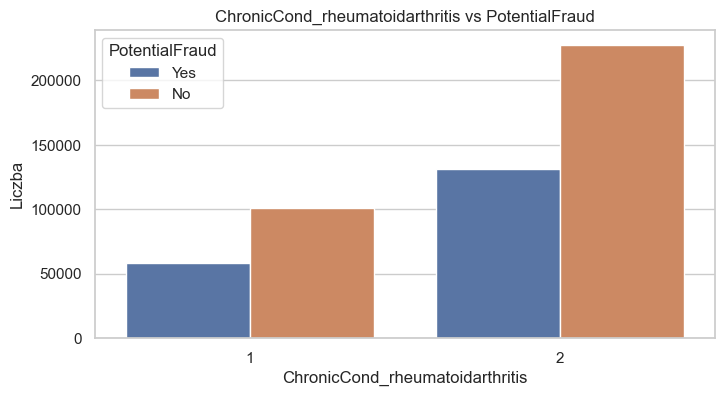

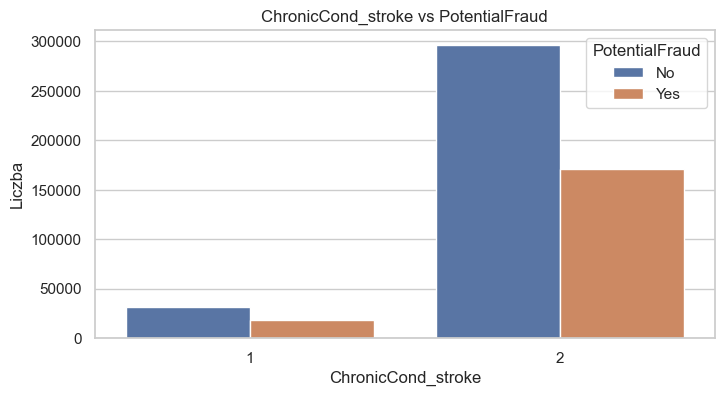

In [12]:
cat_cols = ['Gender', 'Race', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
            'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
            'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
            'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

# Wykresy słupkowe dla zmiennych kategorycznych względem klasy docelowej
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='PotentialFraud', data=df_merged_outpatient)
    plt.title(f'{col} vs PotentialFraud')
    plt.xlabel(col)
    plt.ylabel('Liczba')
    plt.show()

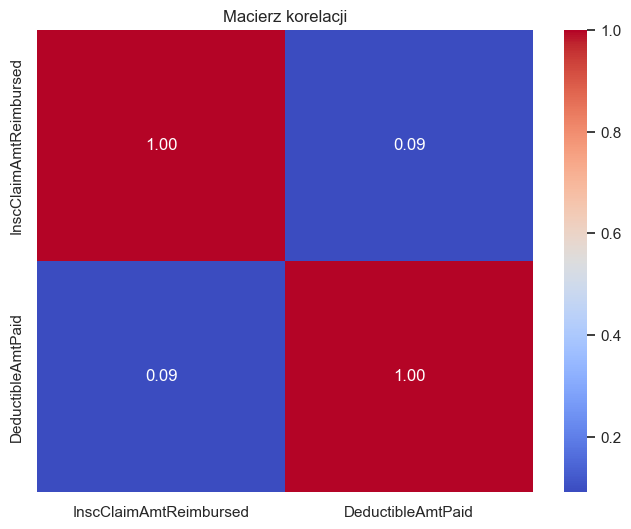

In [13]:
# Korelacja dla zmiennych liczbowych
corr = df_merged_outpatient[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()